In [4]:
#code3-13 로이터 데이터셋을 텍스트로 디코딩하기
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [5]:
#code 3-13 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [6]:
#code 3-14 데이터 인코딩하기
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] =1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
#code3-15 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-18 10:20:35.223515: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-18 10:20:35.223625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
#code3-16 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#code3-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
#code3-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=20,
                    validation_data=(x_val,y_val))

Epoch 1/20


2022-07-18 10:20:35.500698: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  7/400 [..............................] - ETA: 3s - loss: 3.5210 - accuracy: 0.3571      

2022-07-18 10:20:35.718103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


399/400 [============================>.] - ETA: 0s - loss: 1.3737 - accuracy: 0.6977

2022-07-18 10:20:39.478258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


400/400 [==============================] - 4s 10ms/step - loss: 1.3733 - accuracy: 0.6978 - val_loss: 1.0446 - val_accuracy: 0.7650
Epoch 2/20
400/400 [==============================] - 4s 9ms/step - loss: 0.7443 - accuracy: 0.8316 - val_loss: 0.9180 - val_accuracy: 0.8180
Epoch 3/20
400/400 [==============================] - 4s 9ms/step - loss: 0.4782 - accuracy: 0.8970 - val_loss: 0.8900 - val_accuracy: 0.8230
Epoch 4/20
400/400 [==============================] - 4s 10ms/step - loss: 0.3340 - accuracy: 0.9263 - val_loss: 0.9841 - val_accuracy: 0.8200
Epoch 5/20
400/400 [==============================] - 4s 10ms/step - loss: 0.2658 - accuracy: 0.9409 - val_loss: 1.1049 - val_accuracy: 0.8100
Epoch 6/20
400/400 [==============================] - 4s 10ms/step - loss: 0.2272 - accuracy: 0.9465 - val_loss: 1.1504 - val_accuracy: 0.8210
Epoch 7/20
400/400 [==============================] - 4s 10ms/step - loss: 0.2074 - accuracy: 0.9520 - val_loss: 1.1879 - val_accuracy: 0.7960
Epoch 8/20
4

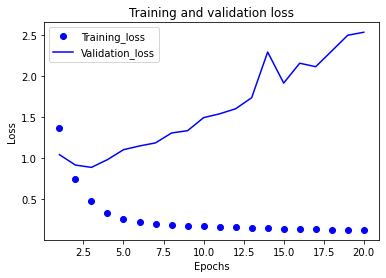

In [12]:
#code 3-19 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

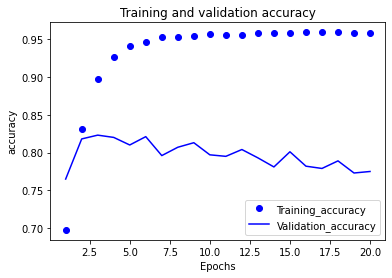

In [13]:
#code 3-20 훈련과 검증 정확도 그리기
plt.clf()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs,accuracy,'bo',label='Training_accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [14]:
#code 3-21 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
 6/16 [==========>...................] - ETA: 0s - loss: 3.2122 - accuracy: 0.4209

2022-07-18 10:22:09.099274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 21ms/step - loss: 2.4287 - accuracy: 0.5417 - val_loss: 1.6438 - val_accuracy: 0.6540
Epoch 2/9
11/16 [===================>..........] - ETA: 0s - loss: 1.3728 - accuracy: 0.7065

2022-07-18 10:22:09.492554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 12ms/step - loss: 1.3408 - accuracy: 0.7105 - val_loss: 1.2729 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 0.9986 - accuracy: 0.7791 - val_loss: 1.1123 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.7919 - accuracy: 0.8289 - val_loss: 1.0208 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6325 - accuracy: 0.8664 - val_loss: 0.9602 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5082 - accuracy: 0.8940 - val_loss: 0.9454 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4069 - accuracy: 0.9129 - val_loss: 0.9075 - val_accuracy: 0.8120
Epoch 8/9
16/16 [==============================] - 0s 12ms/step - loss: 0.3318 - accuracy: 0.9267 - val_loss: 0.9186 - val_accuracy: 0.8110
Epoch 9/9
71/71 [=============

In [15]:
#code 3-23 정보 병목이 있는 모델
model =models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
 6/63 [=>............................] - ETA: 0s - loss: 3.7502 - accuracy: 0.0065     

2022-07-18 10:22:15.962387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 13ms/step - loss: 3.0810 - accuracy: 0.2026 - val_loss: 2.4330 - val_accuracy: 0.3910
Epoch 2/20
 6/63 [=>............................] - ETA: 0s - loss: 2.3970 - accuracy: 0.3867

2022-07-18 10:22:16.815243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 11ms/step - loss: 1.9670 - accuracy: 0.5401 - val_loss: 1.7288 - val_accuracy: 0.5870
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5321 - accuracy: 0.6203 - val_loss: 1.5557 - val_accuracy: 0.6210
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3196 - accuracy: 0.6639 - val_loss: 1.4517 - val_accuracy: 0.6520
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1633 - accuracy: 0.6968 - val_loss: 1.3992 - val_accuracy: 0.6600
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0435 - accuracy: 0.7202 - val_loss: 1.3835 - val_accuracy: 0.6730
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9449 - accuracy: 0.7472 - val_loss: 1.3683 - val_accuracy: 0.6820
Epoch 8/20
63/63 [==============================] - 1s 11ms/step - loss: 0.8605 - accuracy: 0.7653 - val_loss: 1.3841 - val_accuracy: 0.6980
Epoch 9/20
63/63 [======